# Auswertung Adliswil

## Vorbereitung

Zuerst importiere ich die nötigen Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

Ich setze die Option, dass ich später in den Dataframes alle Angaben sehe. Warnungen, dass gewisse Funktionen nach Updates nicht mehr funktionieren könnten, schalte ich der Leserfreundlchkeit halber aus.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

Danach importiere ich die beiden Hauptfiles. Jenes mit den Vorstössen und jenes mit den Namen und Parteien der Politiker/innen.

In [3]:
path2 = "All_Datas/Parlamentarier_Adliswil.csv"
df_parlamentarier = pd.read_csv(path2)

In [4]:
path = "All_Datas/daten_adliswil.csv"
df = pd.read_csv(path)

In [5]:
df.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']","['Mäder Gabriel', 'Schanz Simon', 'Stefan Neubert', 'Anke Würl', 'Martin Rüttimann', 'Walter Uebersax']",2
2,Zwischennutzung Stadthausareal,Postulat,Überwiesen,2011-09-07,[' Clesle Hanspeter'],['Clesle Hanspeter'],3


Damit ich die beiden Listen später mergen kann, muss ich aus den Namenslisten in der Spalte Namen-neu des Vorstoss-Dataframes die einzelnen Elemente herausziehen. Ich will also eine separate Zeile für jede Person, die an einem Vorstoss beteilitgt war. Dazu mache ich eine Kopie des Dataframes, um nichts zu überschreiben. Danach zerteile ich mit der lambda-Funktion die Liste in einzelne Elemente. Und zwar immer dann, wenn ein Komma kommt. Mit der Funktion .explode teile ich die definierten Namen in der Liste schliesslich in einzelne Zeilen auf.

In [6]:
df_vorstoesse = df.copy()
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].apply(lambda x: x if pd.isna(x) else x.split(','))
df_vorstoesse = df_vorstoesse.explode('Namen-neu')
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",['Mäder Gabriel',2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",'Schanz Simon',2


Nun habe ich für alle Personen, die an einem Vorstoss beteiligt waren, eine einzelne Zeile. Um sie mit der Namensliste mergen zu können, müssen die Namen identisch sein. Ich muss also noch sämtliche Klammern und Anführungszeichen eliminieren. Das mache ich mit Hilfe von Regex.

In [7]:
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].str.replace(r"[\[\]']|''", '').str.strip()
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],Senn Mario,1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Mäder Gabriel,2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Schanz Simon,2


Als nächstes will ich die beiden Listen so zusammenfügen, dass ich mit den IDs der Politiker und der Vorstösse arbeiten kann. So kann ich verhindern, dass sich Fehler einschleichen, falls zwei Politiker/innen gleich heissen. Ich merge die beiden Listen zur df_ID.

In [8]:
df_ID = df_vorstoesse.merge(df_parlamentarier, left_on='Namen-neu', right_on='Name', how='left')[['ID-Vorstoss', 'ID-Politiker']]

In [9]:
df_ID.head(5)

,ID-Vorstoss,ID-Politiker
0,1,91
1,2,62
2,2,86
3,2,96
4,2,6


Jetzt habe ich die Grundlage geschaffen, um mit den Auswertungen beginnen zu konnen.

## 1. Welche Parteien reichen am häufigsten Vorstösse ein?

Als erstes merge ich die Dataframes df_ID und df_parlamentarier so, dass ich die Parteien pro Vorstoss sehe.

In [10]:
df_parteien = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_parteien.head(5)

,Partei,ID-Vorstoss
0,FDP,1
1,GLP,2
2,Die Mitte,2
3,GLP,2
4,Die Mitte,2


Danach gruppiere ich die Daten und schaue, dass es dank der Funktion .nunique() die Partei nur einmal zählt, wenn mehrere Politiker/innen der selben Partei an einem Vorstoss beteiligt sind. Ich will hier ja wissen, welche Partei - und nicht welche Person - wie oft an einem Vorstoss beteiligt war. Technisch gesehen, zähle ich also eigentlich die Anzahl verschiedener Vorstoss-IDs, an denen eine Partei beteiligt war.

In [11]:
partei_count = df_parteien.groupby('Partei')['ID-Vorstoss'].nunique().sort_values(ascending=False).reset_index()
partei_count.columns = ['Partei', 'Anzahl_Vorstoesse']
partei_count

,Partei,Anzahl_Vorstoesse
0,SP,64
1,FDP,58
2,FW,35
3,Die Mitte,33
4,SVP,27
5,Grüne,25
6,EVP,22
7,GLP,14


Nun will ich das Resultat in einem Säulendiagramm plotten. Dies auch gleich mit den entsprechenden Parteifarben.

In [12]:
partei_farben = {
    'SP': 'red',
    'FDP': 'blue',
    'FW': 'grey',
    'Die Mitte': 'orange',
    'SVP': 'yellow',
    'EVP': 'gold',
    'Grüne': 'lime',
    'GLP': 'darkgreen'
}

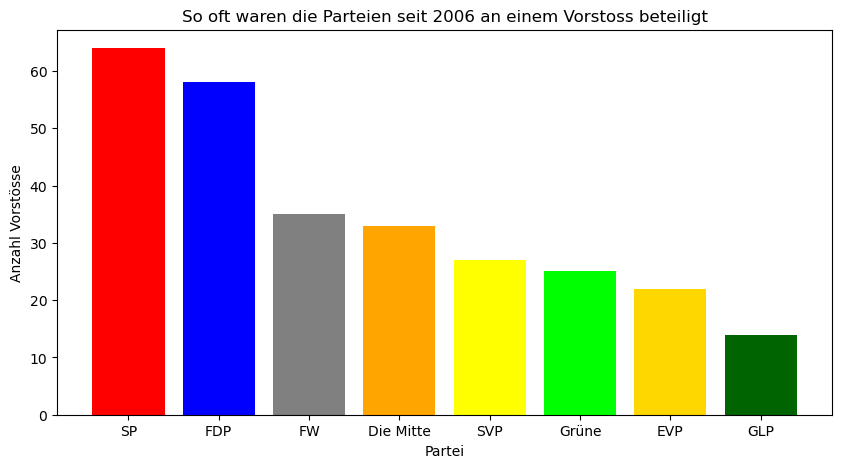

In [13]:
plt.figure(figsize=(10,5))
plt.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=[partei_farben[partei] for partei in partei_count['Partei']])
plt.title('So oft waren die Parteien seit 2006 an einem Vorstoss beteiligt')
plt.xlabel('Partei')
plt.ylabel('Anzahl Vorstösse')
plt.show()

SP und FDP waren also am meisten an Vorstössen beteiligt. Um das etwas einordnen zu können, will ich auch die Anzahl Sitze der Parteien im Parlament ausfindig machen. Diese sind unter www.adliswil.ch/wahlen ersichtlich. Ich habe aus diesen Daten das csv-File "Parteistärke_Adliswil" gemacht und importiere es nun.

In [14]:
path = "All_Datas/Parteistärke_Adliswil.csv"
df_parteistaerke = pd.read_csv(path)
df_parteistaerke.set_index('Jahr', inplace=True)
df_parteistaerke.head(10)

,Die Mitte,EVP,FDP,FW,GLP,Grüne,SP,SVP
Jahr,,,,,,,,
2006,5,2,6,5,0,0,10,8
2010,4,2,6,4,0,2,8,10
2014,5,2,6,4,0,2,7,10
2018,4,2,6,4,2,3,7,8
2022,4,2,6,4,3,4,6,7


Um es grafisch sinnvoll zeigen zu können, berechne ich die durchschnittliche Sitzzahl über die letzten 5 Legislaturen hinweg für jede Partei.

In [15]:
parteistaerke_durchschnitt = df_parteistaerke.mean().sort_values(ascending=False)
parteistaerke_durchschnitt

SVP          8.6
SP           7.6
FDP          6.0
Die Mitte    4.4
FW           4.2
Grüne        2.2
EVP          2.0
GLP          1.0
dtype: float64

Und plotte das ganze ebenfalls als Säulendiagramm mit den Parteifarben.

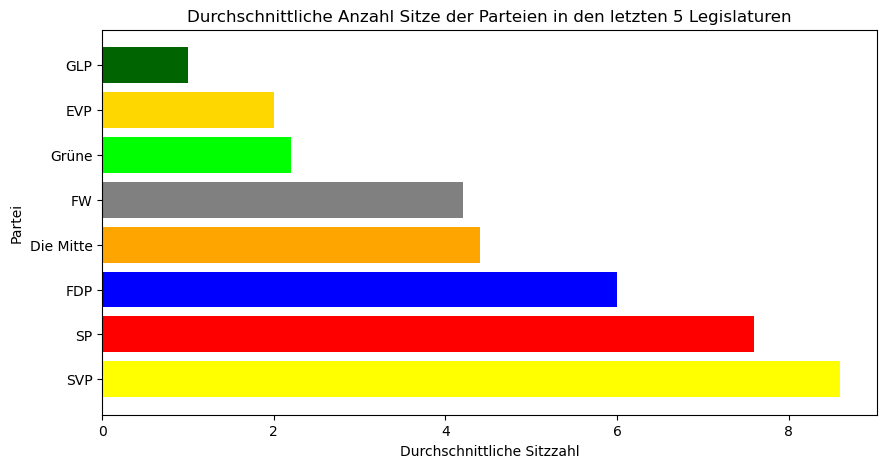

In [16]:
plt.figure(figsize=(10,5))
plt.barh(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt.values, color=[partei_farben[partei] for partei in parteistaerke_durchschnitt.index])
plt.title('Durchschnittliche Anzahl Sitze der Parteien in den letzten 5 Legislaturen')
plt.xlabel('Durchschnittliche Sitzzahl')
plt.ylabel('Partei')
plt.show()

Ich möchte nun auf einen Blick erkennbar machen, dass die SVP zwar am meisten Sitze hat, jedoch vergleichsweise nur sehr wenig Vorstösse einreicht. Um beide Auswertungen in einer Grafik anzuzeigen, verwende ich subplots. 

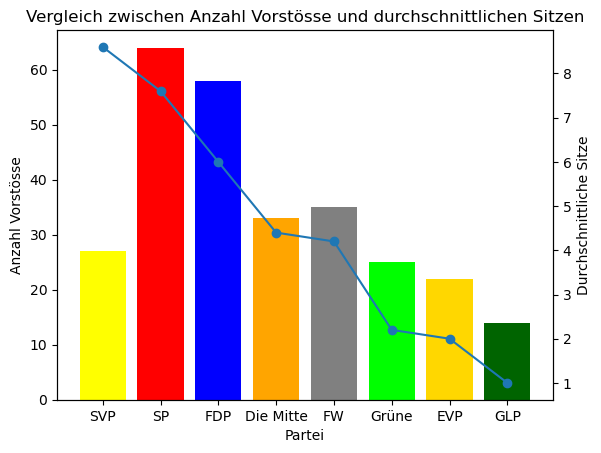

In [17]:
# Zuerst definiere ich die art der Grafik und die erste Achse - und sage, dass es noch eine zweite gibt.
fig, ax1 = plt.subplots()

# Hier definiere ich die Achse mit den durchschnittlichen Sitzen - es soll eine Linie mit Markern sein
# Weil ich auf den y-Achsen zwei verschieden grosse Werte habe, brauche ich unterschiedliche Skalen.
ax2 = ax1.twinx()
# Die Linie soll blau sein
color = 'tab:blue'
# Ich definiere den Titel der Achse
ax2.set_ylabel('Durchschnittliche Sitze')
# Nun definiere ich, was es mir eigentlich anzeigen soll - und dass ich einen blauen, runden Marker will
ax2.plot(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt, color=color, marker='o')

# Hier definiere ich die Achse mit der Anzahl Vorstössen. Die Farben sollen den Parteien entsprechen
color = [partei_farben[partei] for partei in partei_count['Partei']]
# Ich definiere die Achsen
ax1.set_xlabel('Partei')
ax1.set_ylabel('Anzahl Vorstösse')
# Und sage auch hier, was es mir eigentlich anzeigen soll. Die Anzahl Vorstösse nach Partei.
ax1.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=color)

# Zum Schluss setze ich noch einen Titel
plt.title('Vergleich zwischen Anzahl Vorstösse und durchschnittlichen Sitzen')
plt.show()

Mich interessiert als Nächstes, wie oft eine Partei alleine einen Vorstoss einreicht und wie oft Politiker/innen aus mehreren Parteien an einem Vorstoss beteiligt sind. Ich erstelle dazu ein neues Dataframe mit den Spalten "Einzeln" und "Zusammen" und definiere als erstes einen For-Loop für die Parteien. Dazu reduziere ich mit .unique() zuerst sämtliche doppelte Partei-Vorstoss-Kombinationen. Danach schaue ich, ob die Vorstoss-ID nur einmal vorkommt. Das heisst nämlich, dass nur eine Partei beteiligt ist - wenn sie mehrmals vorkommt, sind noch andere Parteien vorhanden.

In [139]:
df_beteiligung_parteien = pd.DataFrame(columns=['Partei', 'Einzeln', 'Mit anderen Parteien'])

for partei in df_parteien['Partei'].unique():
    einzel = 0
    zusammen = 0

    for vorstoss_id in df_parteien[df_parteien['Partei'] == partei]['ID-Vorstoss'].unique():
        if len(df_parteien[df_parteien['ID-Vorstoss'] == vorstoss_id]) == 1:
            einzel += 1
        else:
            zusammen += 1

    df_beteiligung_parteien = df_beteiligung_parteien.append({'Partei': partei, 'Einzeln': einzel, 'Mit anderen Parteien': zusammen}, ignore_index=True)

df_beteiligung_parteien

,Partei,Einzeln,Mit anderen Parteien
0,FDP,23,35
1,GLP,1,13
2,Die Mitte,10,23
3,EVP,9,13
4,SP,29,35
5,FW,5,30
6,SVP,9,18
7,Grüne,3,22


## 2. Wie erfolgreich sind die Parteien mit ihren Vorstössen?

Zuerst merge ich die Dataframes so zusammen, dass ich die Parteien, die Vorstoss-ID, den Status und die Geschäftsart habe.

In [19]:
df_erfolgreich = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_erfolg_alle = df_erfolgreich.merge(df_vorstoesse, left_on = 'ID-Vorstoss', right_on='ID-Vorstoss', how='right')[['ID-Vorstoss','Partei','Status','Geschaeftsart']].drop_duplicates()
df_erfolg_alle.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
0,1,FDP,Abgeschrieben,Postulat
1,2,GLP,Beantwortet,Interpellation
2,2,Die Mitte,Beantwortet,Interpellation
37,3,EVP,Überwiesen,Postulat
38,4,SP,Abgelehnt,Postulat


Um den Erfolg einer Partei mit einem Vorstoss zu messen, muss ich zuerst definieren, was überhaupt erfolgreich bedeutet und was nicht. Das mache ich über den Status der Geschäftsarten. Zuerst muss ich also mal schauen, was ich überhaupt für Geschäftsarten habe.

In [20]:
df_vorstoesse['Geschaeftsart'].unique()

array(['Postulat', 'Interpellation', 'Anfrage', 'Motion',
       'Dringliches Postulat', 'Parlamentarische Initiative'],
      dtype=object)

Sicher ist, dass bei dieser Auswertung Interpellationen und Anfragen keine Rolle spielen. Über diese wird nicht abgestimmt - es kann also weder Erfolg noch Nicht-Erfolg geben. Deshalb beschränkt sich diese Auswertung auf Motionen, Postulate und parlamentarische Initiativen. Ich filtere meine Daten entsprechend.

In [21]:
df_erfolg = df_erfolg_alle[df_erfolg_alle['Geschaeftsart'].isin(['Motion', 'Postulat', 'Dringliches Postulat', 'Parlamentarische Initiative'])]
df_erfolg.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
0,1,FDP,Abgeschrieben,Postulat
37,3,EVP,Überwiesen,Postulat
38,4,SP,Abgelehnt,Postulat
84,9,FDP,Erledigt,Postulat
113,15,Grüne,Überwiesen,Postulat


Um zu sehen, was die möglichen Status sind, zeige ich mir diese mal an.

In [22]:
df_erfolg['Status'].unique()

array(['Abgeschrieben', 'Überwiesen', 'Abgelehnt', 'Erledigt',
       'Nicht überwiesen', 'Nicht zustandegekommen',
       'Pendent Legislative', 'Beantwortet', 'Beschlossen',
       'Teilweise überwiesen', nan], dtype=object)

Ich mache zwei Listen. Eine mit den Begriffen, die für Erfolg stehen, eine mit Begriffen, die für Nicht-Erfolg stehen.

In [23]:
erfolgreich = ['Abgeschrieben', 'Überwiesen', 'Beschlossen', 'Teilweise überwiesen','Teilweise überwiesen','Beantwortet']
nicht_erfolgreich = ['Abgelehnt', 'Nicht überwiesen', 'Nicht zustandegekommen']

Die Begriffe "Erledigt" und "Pendent Legislative" lasse ich bewusst weg, da er nichts über Efolg oder Nicht-Erfolg aussagt. 

In [24]:
df_erfolg_gefiltert = df_erfolg[-df_erfolg['Status'].isin(['Erledigt','Pendent Legislative'])]
df_erfolg_gefiltert.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
0,1,FDP,Abgeschrieben,Postulat
37,3,EVP,Überwiesen,Postulat
38,4,SP,Abgelehnt,Postulat
113,15,Grüne,Überwiesen,Postulat
115,15,GLP,Überwiesen,Postulat


Nun schaue ich, wie oft ein Begriff aus welcher Liste bei welcher Partei vorkommt.

In [25]:
df_erfolg_gefiltert = df_erfolg_gefiltert.copy()
df_erfolg_gefiltert['Erfolgreich'] = df_erfolg_gefiltert['Status'].isin(erfolgreich)
df_erfolg_gefiltert['Nicht Erfolgreich'] = df_erfolg_gefiltert['Status'].isin(nicht_erfolgreich)
df_parteien_erfolg = df_erfolg_gefiltert.groupby('Partei')[['Erfolgreich', 'Nicht Erfolgreich']].sum().reset_index()
df_parteien_erfolg

,Partei,Erfolgreich,Nicht Erfolgreich
0,Die Mitte,5,6
1,EVP,9,1
2,FDP,15,4
3,FW,11,2
4,GLP,1,2
5,Grüne,4,7
6,SP,2,15
7,SVP,12,0


Um das Ganze grafisch darstellen zu können, rechne ich zuerst den Erfolgsanteil in Prozenten aus.

In [26]:
df_parteien_erfolg['Erfolgsrate'] = (df_parteien_erfolg['Erfolgreich'] / (df_parteien_erfolg['Erfolgreich'] + df_parteien_erfolg['Nicht Erfolgreich'])) * 100
df_parteien_erfolg = df_parteien_erfolg.sort_values(by='Erfolgsrate', ascending=True)

Und plotte anschliessend die Erfolgsrate der Parteien in einem Balkendiagramm.

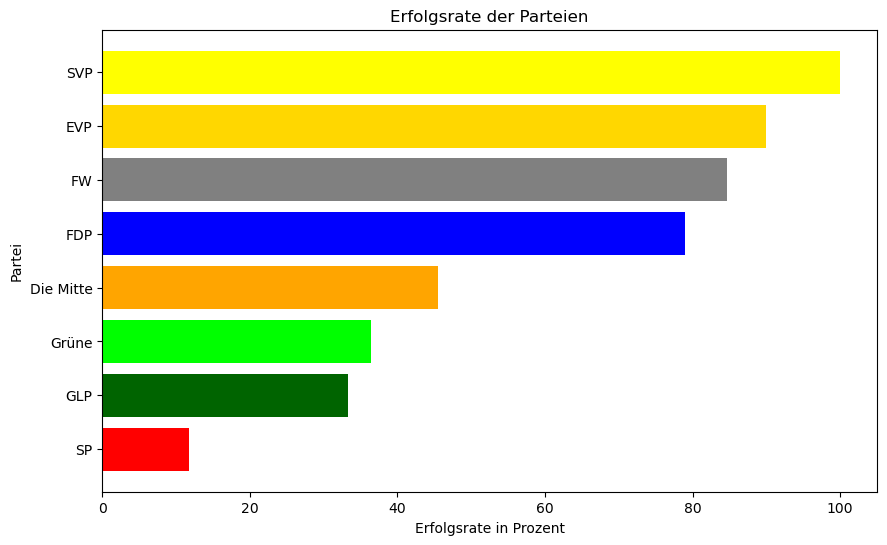

In [27]:
plt.figure(figsize=(10, 6))
color = [partei_farben[partei] for partei in df_parteien_erfolg['Partei']]
plt.barh(df_parteien_erfolg['Partei'], df_parteien_erfolg['Erfolgsrate'], color=color)
plt.title('Erfolgsrate der Parteien')
plt.xlabel('Erfolgsrate in Prozent')
plt.ylabel('Partei')
plt.show()

Die SP bringt kaum einen Vorstoss durch, die SVP jeden. Woran liegt das? Öffenen wir den Blick auf die Lager im Parlament. Dazu bündle ich die Parteien zu drei Lager.

In [28]:
bürgerlich = ['SVP','FDP','FW']
mitte = ['Die Mitte', 'GLP','EVP']
links = ['SP','Grüne']

Ich erstelle eine neue Spalte in der Kopie von df_erfolg_gefiltert und ordne den Parteien mit der lamda Methode ein Lager zu. 

In [29]:
df_erfolg_gefiltert = df_erfolg_gefiltert.copy()
df_erfolg_gefiltert['Lager'] = df_erfolg_gefiltert['Partei'].apply(lambda x: 'bürgerlich' if x in bürgerlich else ('mitte' if x in mitte else 'links'))
df_erfolg_gefiltert.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart,Erfolgreich,Nicht Erfolgreich,Lager
0,1,FDP,Abgeschrieben,Postulat,True,False,bürgerlich
37,3,EVP,Überwiesen,Postulat,True,False,mitte
38,4,SP,Abgelehnt,Postulat,False,True,links
113,15,Grüne,Überwiesen,Postulat,True,False,links
115,15,GLP,Überwiesen,Postulat,True,False,mitte


Nun will ich sehen, wie erfolgreich welches Lager ist.

In [36]:
df_lager_erfolg = df_erfolg_gefiltert.groupby('Lager')[['Erfolgreich', 'Nicht Erfolgreich']].sum().reset_index()
df_lager_erfolg

,Lager,Erfolgreich,Nicht Erfolgreich
0,bürgerlich,38,6
1,links,6,22
2,mitte,15,9


Das stelle ich noch grafisch in einem Balkendiagramm dar, geordnet von plitisch links nach politisch rechts.

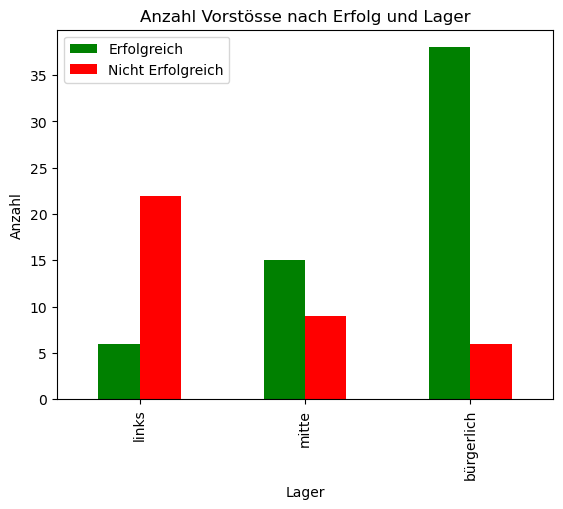

In [99]:
ax = df_lager_erfolg.set_index('Lager').loc[['links', 'mitte', 'bürgerlich']].plot(kind='bar', color=['green', 'red'])
plt.title('Anzahl Vorstösse nach Erfolg und Lager')
plt.xlabel('Lager')
plt.ylabel('Anzahl')
plt.legend(["Erfolgreich", "Nicht Erfolgreich"])
plt.show()

Die Grafik zeigt gut, dass die Ausgangsthese stimmt: Die Bürgerlichen dominieren in Adliswil, die linken Parteien haben wenig Chancen mit ihren Vorstössen. Als Letztes bringe ich nun noch das Sitzverhältnis ins Spiel. Ich greife dazu auf ein csv-File zurück, das die Sitzverteilung nach Lagern zeigt. Dieses habe ich ebenfalls anhand der Seite www.adliswil.ch/wahlen erstellt.

In [115]:
path = "All_Datas/Lagerstärke_Adliswil.csv"
df_lagerstaerke = pd.read_csv(path)
df_lagerstaerke.set_index('Jahr', inplace=True)
df_lagerstaerke.head(10)

,links,mitte,bürgerlich
Jahr,,,
2006,10,7,19
2010,10,6,20
2014,9,7,20
2018,10,8,18
2022,10,9,17


Diese Tabelle sagt eigentlich schon alles. Dennoch plotte ich es in ein Liniendiagram, das zeigt, dass die bürgerlichen Parteien in den letzten 5 Legislaturen unantastbar sind.

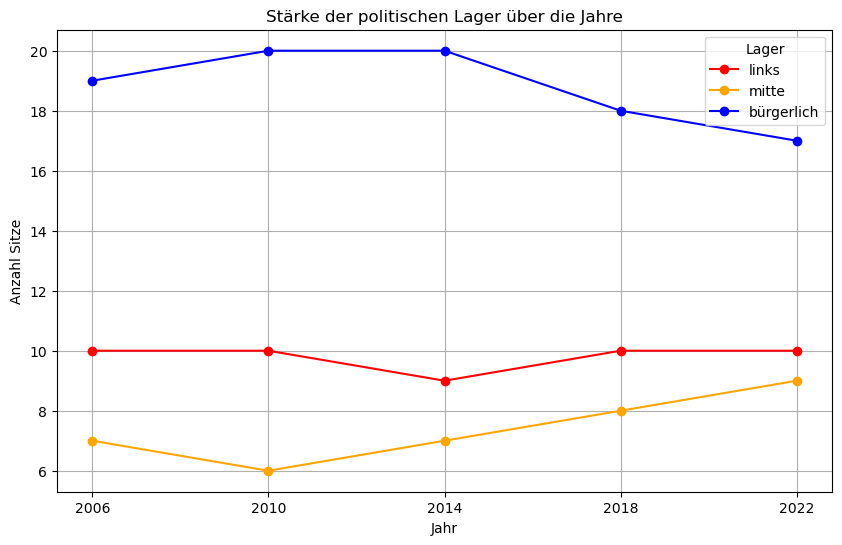

In [137]:
plt.figure(figsize=(10, 6))
# Hier mache ich ein Liniendiagramm für jedes Lager
plt.plot(df_lagerstaerke.index, df_lagerstaerke['links'], marker='o', label='links', color='red')
plt.plot(df_lagerstaerke.index, df_lagerstaerke['mitte'], marker='o', label='mitte', color='orange')
plt.plot(df_lagerstaerke.index, df_lagerstaerke['bürgerlich'], marker='o', label='bürgerlich', color='blue')

# Und füge Titel und Beschriftungen hinzu
plt.title('Stärke der politischen Lager über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Sitze')
plt.legend(title='Lager')
plt.xticks(df_lagerstaerke.index)
plt.grid(True)
plt.show()

## 3. Welches sind die "fleissigsten" Parlamentarier/innen - und wie erfolgreich sind sie?

## 4. Wie viele Vorstösse stammen von Männern und wie viele von Frauen?

Ich füge als erstes die Dataframes df_ID und df_parlamentarier zusammen. Ich lasse mir Parteien und Geschlecht anzeigen.

In [30]:
df_geschlechter = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','Geschlecht','ID-Vorstoss']]
df_geschlechter.head(5)

,Partei,Geschlecht,ID-Vorstoss
0,FDP,m,1
1,GLP,m,2
2,Die Mitte,m,2
3,GLP,m,2
4,Die Mitte,w,2


Danach zähle ich, welches Geschlecht wie oft vorkommt...

In [31]:
geschlechter_counts = df_geschlechter['Geschlecht'].value_counts()
geschlechter_counts

m    344
w     90
Name: Geschlecht, dtype: int64

...und stelle die prozentualen Anteile in einem einfachen Kuchendiagramm dar.

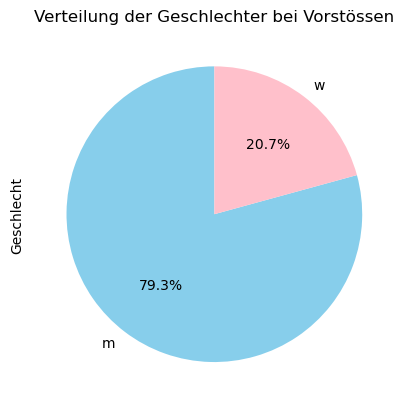

In [32]:
geschlechter_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Verteilung der Geschlechter bei Vorstössen')
plt.show()

Wir sehen also, dass nur an jedem fünften Vorstoss eine Frau beteiligt ist. Um etwas mehr als das aussagen zu können, möchte ich die Anzahl Vorstösse nach Geschlechter auf die einzelnen Parteien herunterbrechen.

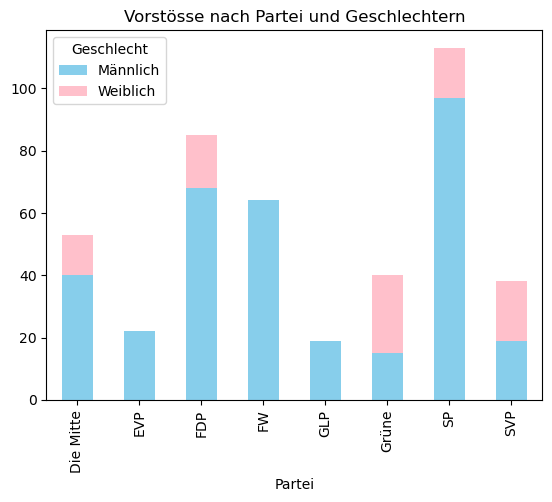

In [94]:
df_geschlechter.groupby(['Partei', 'Geschlecht']).count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Vorstösse nach Partei und Geschlechtern')
plt.legend(title='Geschlecht', labels=['Männlich', 'Weiblich'], loc='upper left')
plt.show()

Nun will ich die generelle Frauenquote der einzelnen Parteien im Parlament ermitteln. Dazu gruppiere ich das Dataframe df_parlamentarier zuerst nach Partei und Geschlect und suche dann mit der lambda Methode alle "w" heraus und berechne den Anteil mal 100, um auf die Prozente zu kommen.

In [34]:
df_geschlechtsanteil_partei = df_parlamentarier.groupby('Partei')['Geschlecht'].apply(lambda x: (x == 'w').mean() * 100).reset_index()
df_geschlechtsanteil_partei.columns = ['Partei', 'Anteil Frauen']
df_geschlechtsanteil_sortiert = df_geschlechtsanteil_partei.sort_values(['Anteil Frauen'],ascending=False)
df_geschlechtsanteil_sortiert

,Partei,Anteil Frauen
5,Grüne,50.000000
6,SP,38.095238
4,GLP,33.333333
2,FDP,26.315789
0,Die Mitte,25.000000
1,EVP,20.000000
7,SVP,15.384615
3,FW,10.000000


Das Ganze lasse ich mir wiederum in einer Grafik anzeigen. Interessant ist, dass die SP zwar einen relativ hohen Frauenanteil im Parlament hat, an den Vorstössen aber in der Regel Männer beteiligt sind. Bei der SVP ist es umgekehrt. Das will ich ebenfalls zeigen. Ich füge also zwei Achsen in die Grafik ein.

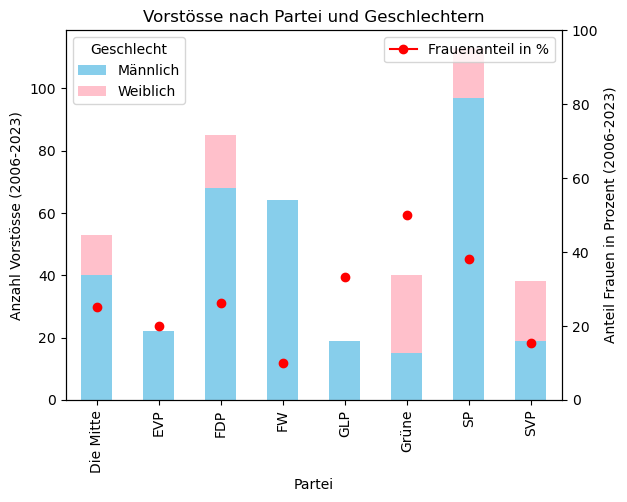

In [112]:
# Zuerst definiere ich, dass es zwei Elemente in der Grafik gegen wird.
fig, ax1 = plt.subplots()

# Dann werte ich die erste aus, setze die Metadaten und definiere sie als ax1.
df_geschlechter.groupby(['Partei', 'Geschlecht']).count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'pink'], ax=ax1)
plt.title('Vorstösse nach Partei und Geschlechtern')
plt.legend(title='Geschlecht', labels=['Männlich', 'Weiblich'], loc='upper left')
ax1.set_ylabel('Anzahl Vorstösse (2006-2023)')

# Ich definiere das zweites Diagramm
ax2 = ax1.twinx()

# Mache die Auswertung zum durchschnittlichen Geschlechtsanteil (habe ich oben schon definiert)
df_geschlechtsanteil_sortiert.groupby(['Partei','Anteil Frauen']).plot(color='red', marker='o', ax=ax2)
ax2.legend(["Frauenanteil in %"], loc='upper right')
ax2.set_ylabel('Anteil Frauen in Prozent (2006-2023)')
ax2.set_ylim(0, 100)

# Und zeige das Diagramm an
plt.show()